# Introduction to ARMA and GARCH processes

***
# Chapter 1: Time Series Fundamentals
***
<br>

Before we start working with ARIMA models, we need to introduce several statistical concepts and terminology first.

## Autocovariance and Autocorrelation

<br>

Let $(X_t)_{t \in \mathbb{Z}}$ be a (discrete) stochastic process.

The __autocovariance__ function $\gamma(t,s)$ is defined as

$$ \gamma(s,t) = \mathbb{E}[(X_t - \mu_t)(X_s - \mu_s)] $$

and the __autocorrelation__ function is defined as

$$ \rho(s,t) = \frac{\gamma(s,t)}{\sqrt{\gamma(s,s)}\sqrt{\gamma(t,t)}}$$

both functions are a way to measure the dependence of the variable given different time periods.

## Stationarity

<br>

In this lecture, we will only consider stationary time series. Stationary time series can be somewhat considered stable
over time. This feature is convenient since it allows us to do forecasting without worrying too much about the
asymptotics of the time series.

<br>

Let $(X_t)_{t \in \mathbb{Z}}$ be a (discrete) stochastic process. The process is called

- __mean stationary__ $: \Leftrightarrow$ for all $t \in T:$ $\mathbb{E}[X_t] = \mu$
- __variance stationary__ $: \Leftrightarrow$ for all $t \in T:$ $\mathbb{V}[X_t] = \sigma^2$
- __covariance stationary__: $: \Leftrightarrow$ for all $s, t, h \in T:$ $\gamma(s,t) = \gamma(s+h,t+h)$

A process which is mean and covariance stationary is also called __weakly stationary__.

<br>

We denote the autocovariance and autocorrelation function of a stationary time series with

$$\gamma(h) = \mathbb{E}[(X_t - \mu)(X_s - \mu)] \qquad \text{and} \qquad \rho(h) = \frac{\gamma(h)}{\gamma(0)}$$

Stationarity can be statistically tested using so called unit-root tests. We will see them in the 3rd section of this notebook.

## Example: Gaussian White Noise

Consider a gaussian white noise process $(\varepsilon_t)_{t \in \mathbb{Z}}$. Recall, the variates of a
a gaussian white noise process are independent and identically distributed, i.e.

$$ \varepsilon_t \stackrel{IID}{\sim} N(0, \sigma_\varepsilon^2) \quad \forall t \in \mathbb{Z}$$


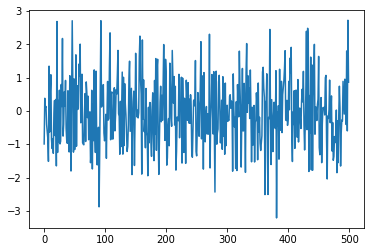

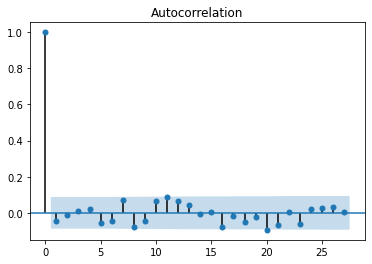

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

Gaussian_WN = np.random.normal(loc=0, scale=1, size=500)
plt.plot(Gaussian_WN)
plt.show()

ACF_GWN = plot_acf(Gaussian_WN)


## Example: Random Walk (Exercise)

The simples symmetric random walk is defined also using some white noise process.
For simplicity, let $(\varepsilon_t)_{t \in \mathbb{Z}}$ be a white noise process. The random
walk process is defined as

$$ y_t = y_{t-1} + \varepsilon_t$$

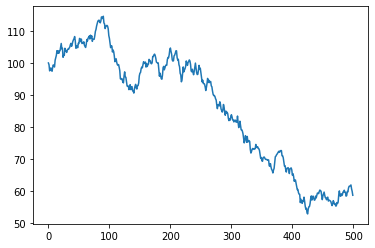

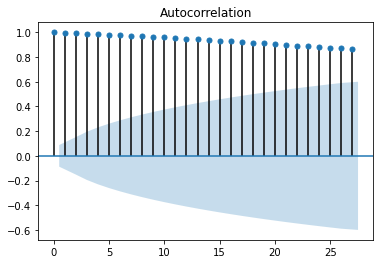

In [2]:
steps = np.random.normal(loc=0, scale=1, size=500)
steps[0]=0

RW = 100 + np.cumsum(steps)
plt.plot(RW)
plt.show()

ACF_RW = plot_acf(RW)

<br>

***
# Chapter 2: ARMA Processes
***

<br>

Autoregressive Moving Average models belong to the parametric family of stationary time series.
ARMA models are in particular important since it is possible to approximate a large class of
series in terms of autocovariance functions. [3, p.73]

## Fundamentals

<br>

Let $(\varepsilon_t)_{t \in \mathbb{Z}}$ be a general white noise process. An __Autoregressive Moving Average
Process $(X_t)_{t \in \mathbb{Z}}$ of order p and q__, that is an __ARMA(p,q)__ is defined by

$$X_t - \phi_tX_{t-1} - ... - \phi_pX_{t-p} = \varepsilon_t + \theta_t\varepsilon_{t-1} + ... \theta_q\varepsilon_{t-q} $$

or using the backward shift operator B

$$ \phi(B)X_t = \theta(B)\varepsilon_t$$

where $\phi(\cdot)$ and $\theta(\cdot)$ are the p-th and q-th-degree polynomials, that is

$$ \phi(x) = 1-\phi_1 x - ... -\phi_p x^p $$

and

$$ \theta(x) = 1 + \theta_1 x + ... + \theta_q x^q $$

Note that this model is a linear model. Furthermore, we refer to an __Autoregressive Model AR(p)__ if no moving average
components are given and __Moving Average Model MA(q)__ if no autoregressive component respectively.

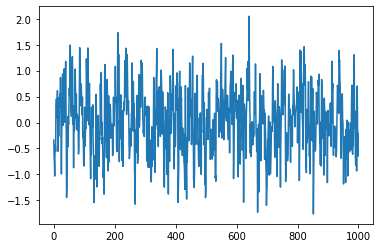

In [3]:
from statsmodels.tsa.arima_process import arma_generate_sample

ar_coefs = [1, -0.5]
ma_coefs = [1, 0.2]
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=1000, scale=0.5)

arma_plot = plt.plot(y)

## Estimation

There are three common ways to estimate the parameters of an ARMA(p,q) process.

- Yule-Walker Estimation (Method of Moments)
- Least-Square Estimation
- Maximum-Likelihood Estimation

We will focus on the Maximum-Likelihood estimator in order to derive the parameters since this is the most common method. However, it requires a specific distribution assumption for the error term $\varepsilon_t$.

A quick reminder, given an ARMA(p,q) model $X_t$, we need to derive the likelihood function which is of the form

$$ L(\beta, \sigma_w^2)= \prod\limits_{i=1}^{n}f_{X}(x_t|x_{t-1},...,x_1)$$

where $\beta=(\mu, \phi_1,...\phi_p, \theta_1,...,\theta_q)'$ denotes the vector of parameters. Naturally, the densities depends on the distribution we assume for the white-noise variates. For an explicite derivation of the quantities, see [1, p.116].

Two common numerical optimization routines for computing the maximum likelihood estimator are the Newton-Raphson and Scoring algorithm. For more details, see [1, p.120]



## Forecasting

Based on a given set of data, we want to predict a future value. Formally,

$$ x_{n+m}^{(n)} = g(x_1,...,x_n)$$

where $g(\cdot)$ is some function used for prediction and $x_{n+m}^{(n)}$ denotes the m-step forecast based on n-past values.

Once $g(\cdot)$ is determined and the forecast made. The predicted value needs to be evaluated and compared to the true/realized value. Keep in mind, that the accuracy of a forecast is always tied to a loss function $l(\cdot)$, i.e.

$$ l(x_{(n+m)}, x_{n+m}^{(n)})$$


In this lecture, we assume that our models are stationary. We will focus on the class of linear predictors which are of the form

$$ x_{n+m}^{(n)} = \alpha_0 + \sum\limits_{k=1}^{n}\alpha_kx_k$$

and set the loss function to be the mean square error

$$ S(\alpha_0,...,\alpha_n) = l(x_{(n+m)}, x_{n+m}^{(n)}) = \mathbb{E}[x_{n+m} - x_{n+m}^{(n)}]^2 $$

Given the data, the best linear predictor $x_{n+m}^{(n)}$ for $m\leq1$ is found by solving

$$\mathbb{E}[(x_{n+m}-x^{(n)}_{n+m})x_k]=0 \qquad k=0,...,n$$

this set of equations are also called prediction equations and originate from the partial derivatives of the loss function with respect to the parameters $\alpha_0,...,\alpha_n$. The predictor is also called Best-Linear-Predictor (BLP).

The Durbin-Levinson Algorithm is commonly applied to solve the prediction equations.[3, p.60]

***
# Chapter 3 : ARCH and GARCH processes
***
<br>

## Fundamentals

<br>

* Volatility is not directly observable and also displays different
  characteristics depend of the time of observation (overnight, intraday, etc.)
* models are also motivated by some stylized facts of financial time series
* return series are not serially correlated, however, squared and absolute returns show profound serial
  correlation
* volatility clustering



In contrast to ARMA models which assume the variance to be constant, ARCH and GARCH models
allow for time dependent variance. There are also called heteroscedastic models.


<br/>

#### Definition (ARCH process)
Let $(\varepsilon_t)_{t \in \mathbb{Z}}$ be a standard white noise process with $\varepsilon_t \sim^{iid}  \text{WN}(0,1)$.
The process $(x_t)_{t \in \mathbb{Z}}$ is an ARCH(p) process iff

\begin{align}
    x_t &= \sigma_t\varepsilon_t \\
    \sigma_t^2 &= \alpha_0 + \sum_{i=1}^{p}\alpha_i x^2_{t-i}
\end{align}

with $\alpha_0 > 0$ and $\alpha_i \geq 0$ for $i=1,...,p$. The latter restrictions are required because the variance needs to be positive.


<br/>

#### Some properties of ARCH processes

* An ARCH(p) process is covariance stationary if: $\quad \sum\limits_{i=1}^p \alpha_i < 1$ <br/>
  If the process is covariance stationary, i.e. stable, the **unconditional** variance is
  well-defined and given by

  \begin{equation} \mathbb{V}[x_t] = \sigma^2 = \dfrac{\alpha_0}{1 - \sum\limits_{i=1}^p \alpha_i} \end{equation}

  The method for computing the unconditional variance is to reformulate the model into a stochastic recurrence equation. Basically, the ARCH process is represented as an ARMA process with $x_{t}^2$ (see [1], p.141). <br/>

* If $x_t$ has finite first moments, the process has the martingale difference property, $\mathbb{E}[x_t|\mathcal{F}_{t-1}]=0$, w.r.t the $\sigma$-algebra generated by $x_t$. In particular, the unconditional mean is zero.

* One can show that the kurtosis of an ARCH process is larger than 3 assuming the fourth moment is well-defined. This is desirable since a kurtosis>3 implies a leptocurtic distribution, i.e. more probability mass on the tails

* A potential drawback is the requirement of many parameters, i.e. many lags, to model the volatility properly (see ACF and PACF). This problem can be circumvented by including past variance variates instead of past returns (see GARCH)




#### Example: ARCH(1)

With $(\varepsilon_t)_{t \in \mathbb{Z}}$ as standard gaussian white noise process with $\varepsilon_t \sim^{iid}  \text{N}(0,1)$. An ARCH(1) $(x_t)_{t \in \mathbb{Z}}$ process is of the form

\begin{align}
    x_t &= \sigma_t\varepsilon_t \\
    \sigma_t^2 &= \alpha_0 + \alpha_{1} x^2_{t-1}
\end{align}

with $\alpha_0, \alpha_1 > 0$. The conditional density $x_t|x_{t-1}$ given normal distribution is given by

$$ x_t|x_{t-1} \sim N(0, \alpha_0 + \alpha_1 x^2_{t-1})$$

Let's simulate the process:

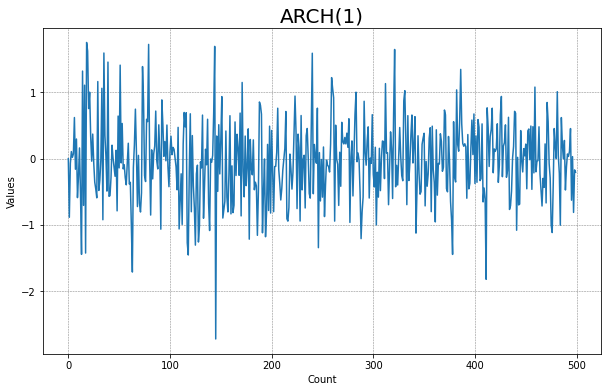

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define some parameters
a_0 = 0.3
a_1 = 0.3

# Tryout unstable version

n = 500

# Preallocate arrays
wn = np.random.normal(size=n)           # white noise
x = np.zeros(n)                         # final time series
sigma_square = np.zeros(n)              # sigma^2


for i in range(1, n):
    sigma_square[i] = a_0 + a_1*(x[i-1]**2)
    x[i] = wn[i]*np.sqrt(sigma_square[i])


fig, ax = plt.subplots(1)
fig.set_size_inches(10, 6)
ax.set_title('ARCH(1)', fontsize = 20)
ax.set_xlabel('Count')
ax.set_ylabel('Values')
ax.grid(color='grey', linestyle='--', linewidth=0.5)
plt.plot(x)
plt.show()



#### Definition (GARCH process)
Let $(\varepsilon_t)_{t \in \mathbb{Z}}$ be standard white noise, i.e. $\varepsilon_t \sim^{iid}  WN(0,1)$.
The process $(x_t)_{t \in \mathbb{Z}}$ is an GARCH(p,q) process if

\begin{align}
    x_t &= \sigma_t\varepsilon_t \\
    \sigma_t^2 &= \alpha_0 + \sum_{i=1}^{p}\alpha_i x^2_{t-i} + \sum_{j=1}^{p}\beta_i \sigma^2_{t-j}
\end{align}

with $\alpha_0 > 0$ and $\alpha_i \geq 0$ for $i=1,...,p$ and $\beta_i \geq 0$ for $j=1,...,q$.

The history of variance is incorporated to this model.

<br/>

#### Some properties of GARCH processes

* High phases of volatility tend to be more **persistent** since $x_t$ is likely to be larger if either $|x_{t-1}|$ or $\sigma_{t-1}$ are large

* An GARCH(p,q) process is covariance stationary if: $\quad \sum\limits_{i=1}^p \alpha_i + \sum\limits_{j=1}^q \beta_j < 1$ <br/>
  This quantity (the sum above) can be seen as a **persistence measure** of shocks to the volatility. Similarly, the rate how the past effects of past shocks decay. The closer to one, the longer it persists. If this is case, similar to above, the unconditional variance is well-defined and is given by 
  
  $$\quad \mathbb{V}[x_t] = \sigma^2 = \dfrac{\alpha_0}{1 - \sum\limits_{i=1}^p \alpha_i - \sum\limits_{j=1}^q \beta_j }$$


#### Example: GARCH(1,1)

With $(\varepsilon_t)_{t \in \mathbb{Z}}$ as standard gaussian white noise process with $\varepsilon_t \sim^{iid}  \text{N}(0,1)$. An ARCH(1) $(x_t)_{t \in \mathbb{Z}}$ process is of the form

\begin{align}
    x_t &= \sigma_t\varepsilon_t \\
    \sigma_t^2 &= \alpha_0 + \alpha_{1} x^2_{t-1} + \beta_1\sigma^2_{t-1}
\end{align}

with $\alpha_0, \alpha_1 > 0$. The conditional density $x_t|x_{t-1}$ given normal distribution is given by

$$ x_t|x_{t-1} \sim N(0, \alpha_0 + \alpha_1 x^2_{t-1}+ \beta_1\sigma^2_{t-1})$$

Let's simulate the process:

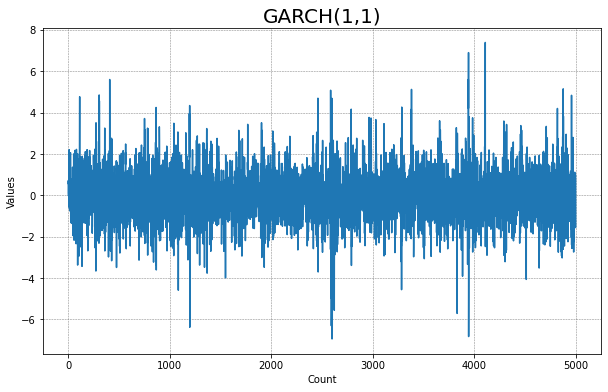

In [5]:
# Define some parameters
a_0 = 0.3
a_1 = 0.3
b_1 = 0.5

# Tryout persistent and unstable combinations

# Sample size
n = 5000

# Preallocate arrays
wn = np.random.normal(size=n)           # white noise
x = np.zeros(n)                         # final time series
sigma_square = np.zeros(n)              # sigma^2


for i in range(1, n):
    sigma_square[i] = a_0 + a_1*(x[i-1]**2) + b_1*sigma_square[i-1]
    x[i] = wn[i]*np.sqrt(sigma_square[i])



fig, ax = plt.subplots(1)
fig.set_size_inches(10, 6)
ax.set_title('GARCH(1,1)', fontsize = 20)
ax.set_xlabel('Count')
ax.set_ylabel('Values')
ax.grid(color='grey', linestyle='--', linewidth=0.5)
plt.plot(x)
plt.show()

## Estimation

### Conditional Densities

Estimation is usually done with the Maximum-Likelihood method. For that, we have to study the conditional distribution of $x_t$ first.

Given two random variables X,Y, the joint densitiy can be expressed in terms of conditional densities

$$ f_{X|Y}(x|y) = \frac{f_{X,Y}(x,y)}{f_X(x)} \quad \Leftrightarrow \quad f_{X,Y}(x,y) = f_{X|Y}(x|y) * f_X(x)$$

Based on this principle the joint distribution of a collection of random variables $X_0,...,X_T$ can be written as

$$ f_{X_0,...,X_T}(x_0,...,x_T) = f_{X_0}(x_0) \prod_{i=1}^{T} f_{X_t|X_{t-1},...,X_0} (x_t | x_{t-1},...,x_0)$$

The analytical expression of the conditional density $f_{X_t|X_{t-1},...,X_0} (x_t | x_{t-1},...,x_0)$ depends on the model, that is the lag order and distribution assumption.

<br/>

### Constructing a likelihood function

Again, take a GARCH(1,1) process with standard gaussian white noise. Let $ X= (X_1, ...,X_N)$ denote a collection of random variables. The likelihood function is then of the form

$$ \mathcal{L}(\alpha_0,\alpha_1,\beta_1; X) = f_{X_0}(x_0) * \prod_{t=1}^{N}f_{X_t|X_{t-1}}(x_t|x_{t-1})$$

Usually $f_{X_0}(x_0)$ is not known. However, the effect of this term is negliable if the sample size is large therefore it is moslty droped. The resulting function is also called the conditional likelihood function. With Gaussian innovations, the explicite form of the conditional likelihood function is given by

$$ L(\alpha_0,\alpha_1,\beta_1; X) = \prod_{t=1}^{N} \frac{1}{\sqrt{2\pi\sigma_t^{2}}}\text{exp}(-\frac{x_t^2}{2\sigma_t^2}) \qquad \text{with} \quad \sigma_t^2=\alpha_0+\alpha_1 x_{t-1}^2 + \beta_1 \sigma_{t-1}^2$$

The log-likelihood function is given by

$$ ln(L(\alpha_0,\alpha_1,\beta_1; X)) = \frac{N}{2}ln(2\pi)-\frac{1}{2}\sum_{t=1}^{N}ln(\sigma_t^2)-\frac{1}{2}\sum_{t=1}^{N}\frac{x_t^2}{\sigma_t^2}$$

This function can now be optimized in order to derive the parameters.

Further note, that $\sigma_t^2$ and $x_t$ are recursively defined, thus $\sigma_0^2$ and $x_0$ needs to be pre-determined. For $\sigma_0$  the sample variance is mostly usedand $x_0$ is the corresponding value at that given time.


### References

#### Chapter 1 - Chapter 2


[1] Shumway, Stoffer (2017) - Time Series Analysis and Its Applications - With R Examples

[2] Brockwell, Davis (2006) - Time Series - Theory and Methods

[3] Brockwell, Davis (2016) - Introduction to Time Series and Forecasting


<br>
<br>


#### Chapter 3

[1] McNeil, Frey, Embrechts,(2005), p.139-145

[2] Lütkepohl (2007), p.559-560

[3] Tsay (2010), p.109-171

